In [48]:
#importa pandas, la librería de Anñalisis de Datos de Python
import pandas as pd
#importa numpy, una librería de computación numérica
import numpy as np
# Importamos las métricas
from sklearn.metrics import accuracy_score 
#Importa el Escaler Estandard
from sklearn.preprocessing import StandardScaler
#Este es el paquete que permite separar el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Este es el que permite balancear los casos, siempre en el conjunto de entrenamiento
from imblearn.over_sampling import SMOTE
#Contiene todo el código para los modelos de Regresión Logística
from sklearn.linear_model import LogisticRegression
#Contiene todo el código para los modelos que usan Máquinas con vectores de apoyo(SVM)
from sklearn.svm import SVC
#Contiene todo el código para los modelos de Random Forest
from sklearn.ensemble import RandomForestClassifier
#Contiene el código necesario para implementar Knn
from sklearn.neighbors import KNeighborsClassifier

#Lee el dataser de diabetes que está en formato csv y retorna un DataFrame
df = pd.read_csv("diabetes.csv")
dataset = df
columns_incorrect = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
#Sustituye todos los ceros en las variables
for column in columns_incorrect:
    #Separa el dataset en los casos que se sabén que son diabéticos de los que no lo son
    df1 = dataset.loc[dataset['Outcome'] == 1]
    df2 = dataset.loc[dataset['Outcome'] == 0]
    #Reemplaza todos los ceros de las variables con las medianas no con las medias
    df1 = df1.replace({column:0}, np.median(df1[column]))
    df2 = df2.replace({column:0}, np.median(df2[column]))
    dataframe = [df1, df2]
    dataset = pd.concat(dataframe)
#En esta parte tratamos los Outliers
#Ahora utilizaremos un escaler para normalizar los calores de las variables
Y = dataset.Outcome
x = dataset.drop("Outcome", axis = 1)
columns = x.columns
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)
#Ahora separamos el dataset en dos partes, un conjunto de entrenamiento y otro de prueba
#El conjunto de prueba es de 15% del total.
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)
#Como es evidente que los datos son invalanceados, se usa la técnica SMOTE para valancearlos
#Esta técnica genera datos a partir de los existentes, pero solo en el conjunto de entrenamiento
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
#Ya es momento de entrenar los primeros modelos y lo hacemos con una regresión logística
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy LogisticR: {:.2f}'.format(logreg.score(x_test, y_test)))
#Ahora entrenamos un modelo de Máquina con vectores de apoyo o SVM usando un kernel rbf
classifier_rbf = SVC(kernel = 'poly', C=0.5)
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy SVM C(RBF): {:.2f}'.format(classifier_rbf.score(x_test, y_test)))
#Ahora entrenamos un modelo basado en Random Forest
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy Random F: {:.2f}'.format(model.score(x_test, y_test)))
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
print('Accuracy KNN: {:.2f}'.format(neigh.score(x_test,y_test)))
#La Accuracy de los modelos entrenados por este procedimiento son los siguientes:
# Regresión Loística: 076
# Support Vector Clasifier, con Kernel RBF: 0.75
# Random Forest: 0.84
#Esta baja Accuracy de Regresión Logistica y SVC probablemente sea debido a los Outliers, ya que 
#son métodos basados en distancia a diferencia de Random Forest

Accuracy LogisticR: 0.74
Accuracy SVM C(RBF): 0.74
Accuracy Random F: 0.84
Accuracy KNN: 0.74


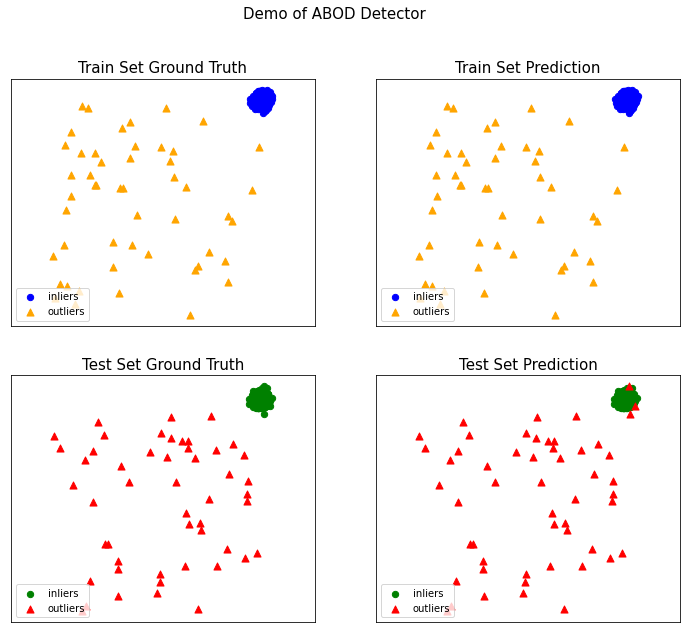

In [44]:
import pandas as pd
from pyod.models.abod import ABOD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.model_selection import train_test_split
from pyod.utils.data import generate_data
#***************************************
contamination = 0.1 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 2      # number of features

X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features= n_features,
                                                 contamination=contamination,behaviour="new")
#***************************************
OD_Name = "ABOD"
od=ABOD(method="fast")
od.fit(X_train)
#***************************************
y_train_pred = od.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = od.decision_scores_  # raw outlier scores
y_test_pred = od.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = od.decision_function(X_test)  # outlier scores
visualize(OD_Name, X_train, y_train, X_test, y_test, y_train_pred,y_test_pred, show_figure=True, save_figure=False)


Describe los datos originales


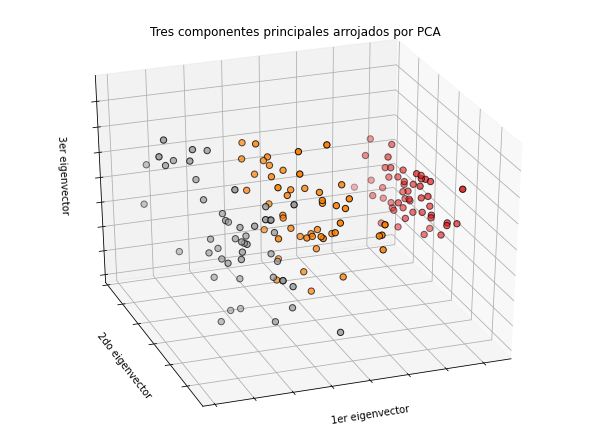

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
#************************************************************************
# En esta sección se carga el dataset del conjunto de datasets internos
# de Scikit_learn
iris_data = datasets.load_iris(as_frame=True)
iris_target = iris_data.target
#************************************************************************
# En esta se crea un objeto a partir de la clase PCA y como argumento 
# toma la cantidad de componentes a los que queremos reducir nuestros 
# dataset. Si no sabemos o no queremos establecer un número de componentes
# le pasamos como parámetro 0.95 que significa que queremos mantener el 
# el 95% de la varianza de los datos
PCA_DR = PCA(n_components=3)
# Aquí se calculan los componentes, es decir esta es la aplicación de PCA
PCA_DR.fit(iris_data.data)
# Aquí se transforma el dataset a partir de los calculos anteriores
iris_Tranf= PCA_DR.transform(iris_data.data)
#************************************************************************
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris_Tranf[:, 0], iris_Tranf[:, 1], iris_Tranf[:, 2], c=iris_target,cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Tres componentes principales arrojados por PCA para el dataset iris")
ax.set_xlabel("1er eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2do eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3er eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [3]:
import pandas as pd

pima_diabetesDF = pd.read_csv("diabetes.csv")
pima_diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
#Clasificación del Iris Dataset con KNN
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#******************************************************************
iris = datasets.load_iris(as_frame=True)

#******************************************************************
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.25, random_state = 0)
#******************************************************************
caler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
#******************************************************************
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors, metric='euclidean',weights='distance', algorithm='ball_tree')
knn.fit(X_train, y_train)
print('Accuracy de KNN con k= 7 training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy  KNN con k=7 test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))


Accuracy de KNN con k= 7 training set: 1.00
Accuracy  KNN con k=7 test set: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [63]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
#******************************************************************
iris = datasets.load_iris(as_frame=True)

#******************************************************************
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.25, random_state = 0)
#******************************************************************
caler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
#******************************************************************
ovr_clf = OneVsRestClassifier(SVC(kernel='rbf',  gamma='auto'))
ovr_clf.fit(x_train, y_train)
y_pred=ovr_clf.predict(x_test)
print("Datos para SVM sobre el Test Set")
print(classification_report(y_test,y_pred))
#*******************************************************************
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train)
y_pred=sgd_clf.predict(x_test)
print("Datos para SGD sobre el Test Set")
print(classification_report(y_test,y_pred))

Datos para SVM sobre el Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Datos para SGD sobre el Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.38      0.55        16
           2       0.47      1.00      0.64         9

    accuracy                           0.74        38
   macro avg       0.82      0.79      0.73        38
weighted avg       0.88      0.74      0.72        38



In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#*****************************************************************
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Número de puntos incorrectamente clasificados del total %d punto : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Número de puntos incorrectamente clasificados del total 75 punto : 4


Datos para DT sobre el Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.659\nsamples = 75\nvalue = [29, 20, 26]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 5.05\ngini = 0.491\nsamples = 46\nvalue = [0, 20, 26]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.165\nsamples = 22\nvalue = [0, 20, 2]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(200.88000000000002, 65.232, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

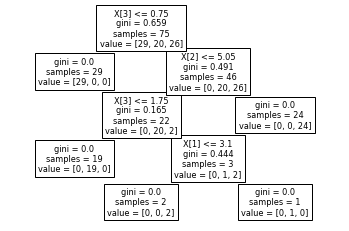

In [75]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
#*************************************************
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
Dtree = DecisionTreeClassifier()
y_pred= Dtree.fit(X_train,y_train).predict(X_test)
print("Datos para DT sobre el Test Set")
print(classification_report(y_test,y_pred))
plot_tree(Dtree)

In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
#*******************************************************************
#Lee el dataser de diabetes que está en formato csv y retorna un DataFrame
df = pd.read_csv("diabetes.csv")
dataset = df
columns_incorrect = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
#Sustituye todos los ceros en las variables
for column in columns_incorrect:
    #Separa el dataset en los casos que se sabén que son diabéticos de los que no lo son
    df1 = dataset.loc[dataset['Outcome'] == 1]
    df2 = dataset.loc[dataset['Outcome'] == 0]
    #Reemplaza todos los ceros de las variables con las medianas no con las medias
    df1 = df1.replace({column:0}, np.median(df1[column]))
    df2 = df2.replace({column:0}, np.median(df2[column]))
    dataframe = [df1, df2]
    dataset = pd.concat(dataframe)
#En esta parte tratamos los Outliers
#Ahora utilizaremos un escaler para normalizar los calores de las variables
Y = dataset.Outcome
x = dataset.drop("Outcome", axis = 1)
columns = x.columns
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)
#Ahora separamos el dataset en dos partes, un conjunto de entrenamiento y otro de prueba
#El conjunto de prueba es de 15% del total.
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)
#Como es evidente que los datos son invalanceados, se usa la técnica SMOTE para valancearlos
#Esta técnica genera datos a partir de los existentes, pero solo en el conjunto de entrenamiento
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
#******************************************************************************************************
# Ahora aplicamos Random Forest
Forest = RandomForestClassifier()
Forest.fit(x_train, y_train)
y_pred = Forest.predict(x_test)
print("Accurace de RF", classification_report(y_test,y_pred))

Accurace de RF               precision    recall  f1-score   support

           0       0.85      0.91      0.88        70
           1       0.85      0.76      0.80        46

    accuracy                           0.85       116
   macro avg       0.85      0.84      0.84       116
weighted avg       0.85      0.85      0.85       116

